In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def cosine_scheduling(
    base_value: float, 
    final_value: float, 
    epochs: int, 
    iters_per_epoch: int,
    warmup_epochs: int = 0, 
    start_warmup_value: float = 0.0
    ):


    warm_up = np.array([])
    warm_up_iters = warmup_epochs * iters_per_epoch
    
    if warmup_epochs > 0:
        warm_up = np.linspace(start=start_warmup_value, stop=base_value, num=warm_up_iters)

    iters = np.arange(epochs * iters_per_epoch - warm_up_iters)
    cosine = final_value + 0.5 * (base_value - final_value) * (1 + np.cos((iters * np.pi) / len(iters)))

    schedule = np.concatenate((warm_up, cosine))

    return schedule


In [22]:
base_value = 0.0005 * 256/ 256
final_value = 1.0e-6
epochs = 100
iters_per_epoch = 1
warmup_epochs = 10

schedule = cosine_scheduling(base_value, final_value, epochs, iters_per_epoch, warmup_epochs)

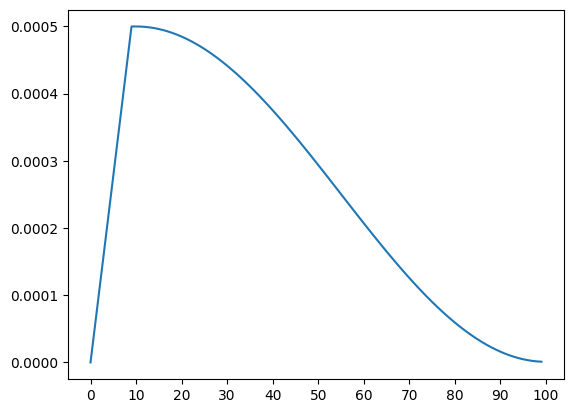

In [23]:
plt.plot(schedule)
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

In [24]:
epochs = 100
num_warmup_epochs = 0
teacher_temp = (0.04, 0.04)

temperatures = np.concatenate([
    np.linspace(
        start=teacher_temp[0], 
        stop=teacher_temp[1],
        num=num_warmup_epochs
    ), np.ones(epochs - num_warmup_epochs) * teacher_temp[1]
    ])

len(temperatures)

100

In [25]:
temperatures

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04])

In [26]:
def get_teacher_temperatures(
    epochs: int, 
    num_warmup_epochs: int, 
    start: float, 
    end: float
    ) -> np.ndarray:

    if num_warmup_epochs > 0:
        assert start != end, "start and end must be differemt when num_warmup_epochs > 0"

    if num_warmup_epochs == 0:
        assert start == end, "Start and end must be the same when num_warmup_epochs == 0"

    warmup = np.linspace(start=start, stop=end, num=num_warmup_epochs)
    remaining = np.ones(epochs - num_warmup_epochs) * end

    temperatures = np.concatenate([warmup, remaining], axis=0)

    return temperatures

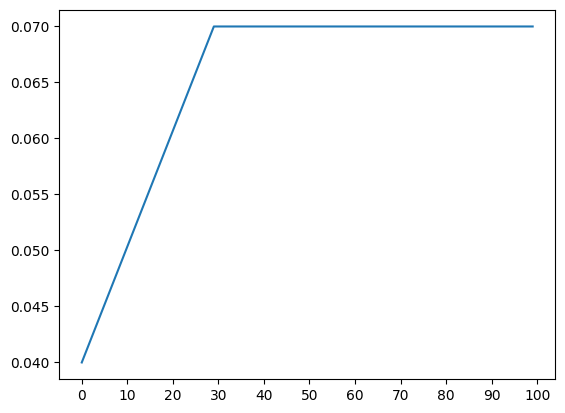

In [27]:
plt.plot(get_teacher_temperatures(100, 30, 0.04, 0.07))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

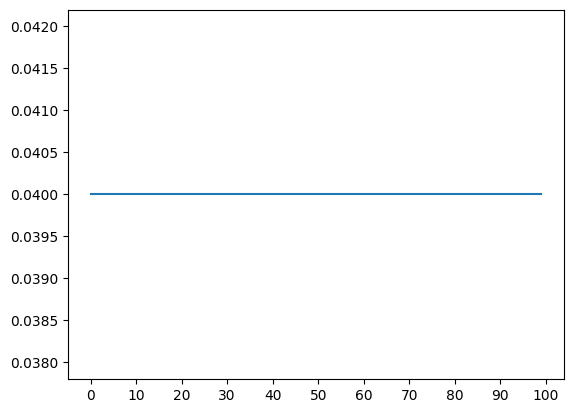

In [28]:
plt.plot(get_teacher_temperatures(100, 0, 0.04, 0.04))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

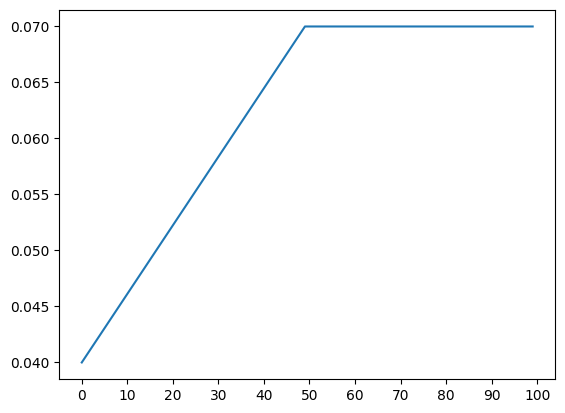

In [29]:
plt.plot(get_teacher_temperatures(100, 50, 0.04, 0.07))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

In [30]:
def get_teacher_temperatures(
    epochs: int, 
    num_warmup_epochs: int, 
    base_value: float, 
    final_value: float
    ) -> np.ndarray:
    """
    Constructs the list of temperatures for the teacher according to the 
    configured schedule.

    Parameters
    ----------
    epochs: int
        The total number of training epochs.

    num_warmup_epochs: int
        The number of warmup epochs.

    base_value: float
        The base temperature value.

    final_value: float
        The final temperature value.

    Returns
    -------
    temperatures: np.ndarray
        The array of temperatures per epoch.
    """

    if num_warmup_epochs > 0:
        assert base_value != final_value, "start and end must be differemt when num_warmup_epochs > 0"

    if num_warmup_epochs == 0:
        assert base_value == final_value, "Start and end must be the same when num_warmup_epochs == 0"

    warmup = np.linspace(start=base_value, stop=final_value, num=num_warmup_epochs)
    remaining = np.ones(epochs - num_warmup_epochs) * final_value

    temperatures = np.concatenate([warmup, remaining], axis=0)

    return temperatures

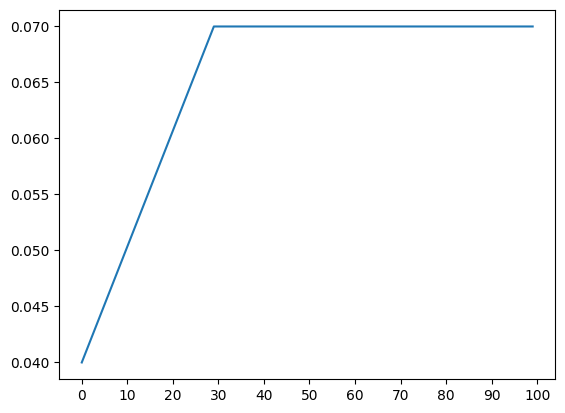

In [31]:
plt.plot(get_teacher_temperatures(100, 30, 0.04, 0.07))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

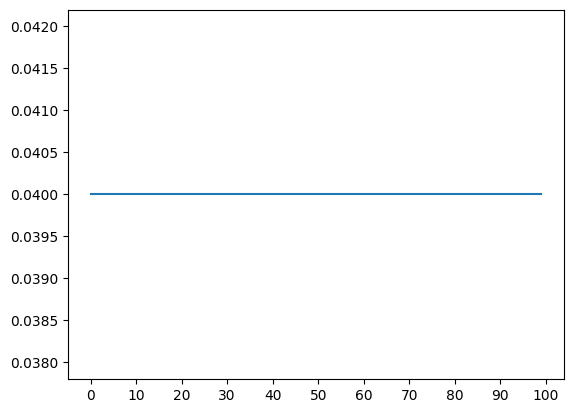

In [32]:
plt.plot(get_teacher_temperatures(100, 0, 0.04, 0.04))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()

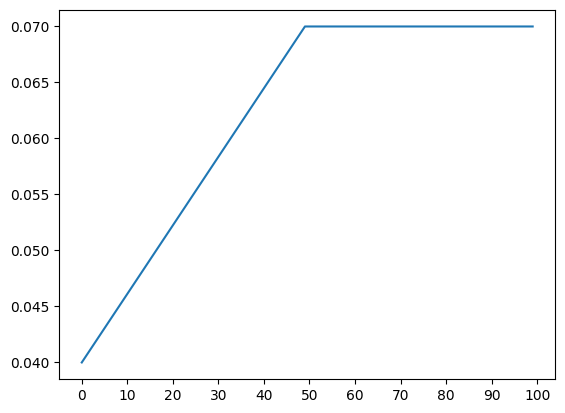

In [33]:
plt.plot(get_teacher_temperatures(100, 50, 0.04, 0.07))
plt.xticks([i for i in range(0, 101, 10)])
plt.show()